In [1]:
import numpy as np
import pandas as pd

In [2]:
hedge_fund = pd.read_csv('Return.csv',index_col=0)

In [3]:
hedge_fund.head()

,FOF,S&P500,Pearl Brook,HFRI,1+Return(FOF),1+Return(S&P),1+Return(Pearl Brook),1+Return(HFRI),FOF LLC,S&P500.1,Pearl Brook.1,HFRI.1
15-Apr,-0.12,0.96,1.14,1.82,99.88,100.96,101.14,101.82,998.80,1009.60,1011.40,1018.20
15-May,1.16,1.29,2.78,0.96,101.16,101.29,102.78,100.96,1010.42,1022.62,1039.52,1027.97
15-Jun,3.72,-1.94,-0.18,-0.93,103.72,98.06,99.82,99.07,1048.02,1002.78,1037.65,1018.41
15-Jul,1.97,2.10,3.01,-1.18,101.97,102.10,103.01,98.82,1068.65,1023.84,1068.88,1006.40
15-Aug,-0.48,-6.03,-1.22,-3.28,99.53,93.97,98.78,96.72,1063.58,962.11,1055.84,973.39


In [4]:
invest_1000 = hedge_fund.iloc[:,-4:]

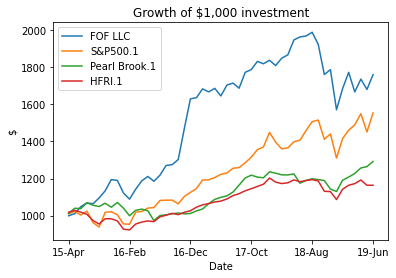

In [5]:
import matplotlib.pyplot as plt
invest_1000.plot(kind="line")
plt.xlabel("Date")
plt.ylabel("$")
plt.title("Growth of $1,000 investment")
plt.show()

In [7]:
# The holding period return is 76%
HPR = hedge_fund['FOF LLC'][-1] / hedge_fund['FOF LLC'][0] - 1
print(HPR)

0.7622547056467763


In [8]:
# We can also annualize the return

# Calculate number of years
t = len(hedge_fund['FOF LLC']) / 12

In [11]:
CAGR = (1 + HPR) ** (1/t) - 1
CAGR
# The average return of FJ during this period is about 14% annually

0.14261129455132604

In [17]:
# Correlation between the FOF and the market
np.corrcoef(hedge_fund['FOF'],hedge_fund['S&P500'])[0,1]

0.6188406303447486

In [18]:
# To calculate Beta 
beta = np.cov(hedge_fund['S&P500'], hedge_fund['FOF'], ddof=0)[0][1] / np.var(hedge_fund['S&P500'], ddof=0)
print(beta)

0.7301058154689146


In [23]:
from random import randint
walk = [0]
for _ in range(200):
    walk.append(randint(-1, 1)+walk[-1])

In [25]:
walk[-1]

-7